## Data Analysis with pandas

We are going to examine data from the [Bangalore Open Data Repository](https://github.com/openbangalore/bangalore). Bangalore is the 3rd most populous city in India and widely regarded as the Silicon Valley of India.

### Task 1 - Load Data

- Read in the data to pandas
- Check the shape of the dataframe
- Check the summary statistics of the dataframe
- Change the row index to the "Year" column

In [141]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(sum(map(ord, "aesthetics")))

bangalore = pd.read_csv('bangalore_temparature.tsv', sep='\t')


In [115]:
bangalore.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,23.094,24.243,25.398,27.740,26.328,24.735,23.969,24.154,25.097,24.301,23.090,21.000
1,1902,21.588,22.930,26.277,27.442,27.118,25.477,24.428,25.019,23.940,23.759,22.790,22.184
2,1903,22.296,23.969,26.552,27.764,26.718,25.132,24.004,23.958,23.925,23.587,21.693,20.727
3,1904,20.982,22.623,25.636,27.510,25.878,23.714,23.278,24.032,24.408,24.185,22.214,21.119
4,1905,21.740,24.158,26.095,26.977,26.863,25.271,24.453,24.444,24.476,24.007,23.029,21.372


In [116]:
bangalore.shape

(102, 13)

In [117]:
bangalore.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1951.500000,22.122088,24.028069,26.375049,27.844608,27.108118,24.923186,23.985824,24.125373,24.347304,24.100167,22.882186,21.759961
std,29.588849,0.617820,0.732336,0.656179,0.558630,0.636558,0.547904,0.485182,0.373501,0.520555,0.458388,0.581238,0.554744
min,1901.000000,20.699000,22.145000,24.791000,26.725000,25.378000,23.621000,22.770000,23.090000,23.189000,22.838000,21.693000,20.648000
25%,1926.250000,21.768250,23.502250,25.965000,27.452000,26.691500,24.601000,23.620000,23.856000,23.977500,23.827000,22.438250,21.313000
50%,1951.500000,22.187000,24.074000,26.462500,27.899000,27.231000,24.932500,24.022500,24.080500,24.351000,24.149500,22.934500,21.826500
75%,1976.750000,22.476750,24.534000,26.748500,28.213750,27.579250,25.250750,24.293500,24.430250,24.685500,24.354000,23.234000,22.114250
max,2002.000000,23.530000,26.134000,28.048000,29.068000,28.272000,26.427000,25.190000,25.019000,25.869000,25.413000,24.478000,23.124000


In [118]:
bangalore = bangalore.set_index('Year')
bangalore.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1901,23.094,24.243,25.398,27.740,26.328,24.735,23.969,24.154,25.097,24.301,23.090,21.000
1902,21.588,22.930,26.277,27.442,27.118,25.477,24.428,25.019,23.940,23.759,22.790,22.184
1903,22.296,23.969,26.552,27.764,26.718,25.132,24.004,23.958,23.925,23.587,21.693,20.727
1904,20.982,22.623,25.636,27.510,25.878,23.714,23.278,24.032,24.408,24.185,22.214,21.119
1905,21.740,24.158,26.095,26.977,26.863,25.271,24.453,24.444,24.476,24.007,23.029,21.372


### Task 2 - Initial Data Analysis

- (Chart) How does temperature vary over the year (X-axis is months)?
- (Chart) How does temperature vary over the years (X-axis is years)?
- Which months had the highest and lowest temperatures in 1960?
- What were the highest, lowest and mean values in 1960?
- Where were the highest, lowest and mean values in an arbitray year (hint: write a function)?
- Which months had the highest and lowest gains in temperature?
- Make a histogram, KDE plot and bar plot of the gains.

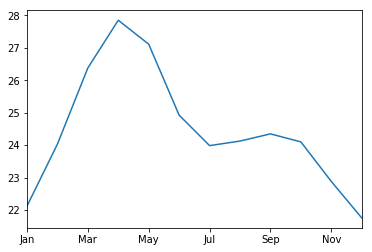

In [119]:
bangalore.mean().plot()

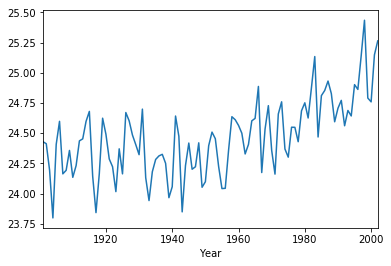

In [120]:
temps_year = bangalore.T
temps_year.mean().plot()

In [121]:
temps_year[1960].idxmin()

'Dec'

In [122]:
temps_year[1960].idxmax()

'Apr'

In [123]:
temps_year[1960].mean()

24.564083333333333

In [124]:
temps_year[1960].max()

28.141999999999999

In [125]:
temps_year[1960].min()

21.814

In [126]:
def findtemps(year):
    print('max')
    print(temps_year[year].max())
    print('min')
    print(temps_year[year].min())
    print('mean')
    print(temps_year[year].mean())
findtemps(1960)

max
28.142
min
21.814
mean
24.564083333333333


In [127]:
min_temp = 0
min_id = 'a'
max_temp = 0
max_id = 'a'
for month in bangalore:
    diff = bangalore[month].max() - bangalore[month].min()
    if max_temp == 0 or diff > max_temp:
        max_temp = diff
        max_id = month
    if min_temp == 0 or diff < min_temp:
        min_temp = diff
        min_id = month
print(min_id)
print(min_temp)
print(max_id)
print(max_temp)


Aug
1.929
Feb
3.989


In [128]:
temps_year['gain'] = (temps_year[2001] - temps_year[1901]) / temps_year[1901]

In [129]:
gains = temps_year['gain']

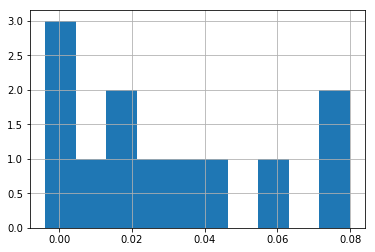

In [130]:
gains.hist()

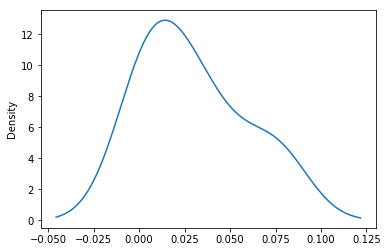

In [131]:
gains.plot(kind='kde')

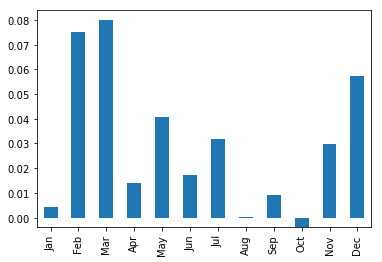

In [132]:
gains.plot(kind='bar')

### Task 3 - Visualization

matplotlib
- Make a histogram for a particular month.
- Compare distributions for 2 months (histograms on subplots).
- Compare two years in the same histogram (use color coding).
- Define a function to compare two months in the same frame.
- Create a box plot for 1 month.
- Create a box plot for 2 months on 1 figure.
- Create a function that compares 2 months via boxplot.

seaborn
- Make a KDE plot of one month.
- Make a function that compares the KDE plots of 2 months.
- Compare the histogram and KDE plots of 2 months on the same figure.
- Create a Facetgrid version of the KDE plots. Loop through a months array.
- Create a violin plot for 1 month.
- Create a violin plot for 2 months on 1 figure.
- Create a function that compares 2 months via violin plot.

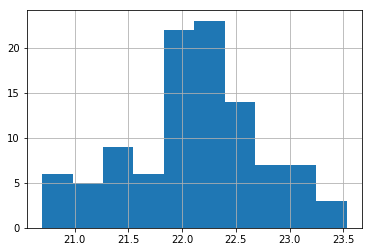

In [133]:
bangalore['Jan'].hist()

In [134]:
def compare_hist(month1, month2):
    f, (ax1) =  plt.subplots(1)
    bangalore.hist(column=month1, bins=10, ax=ax1)
    bangalore.hist(column=month2, bins=10, ax=ax1, color='red')
    
    plt.xlabel('Temperature')
    plt.ylabel('Number of Years')
    
    plt.title(month1 + ' vs. ' + month2)

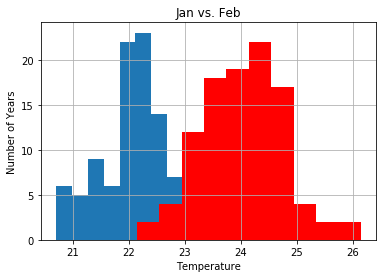

In [135]:
compare_hist('Jan', 'Feb')

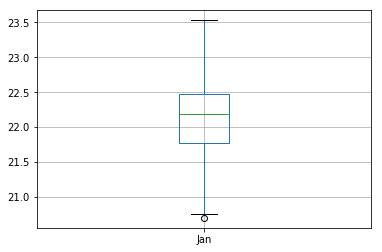

In [136]:
#bangalore.boxplot('Jan')
bangalore.boxplot(column='Jan', return_type='axes')

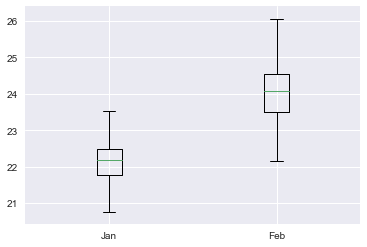

In [207]:
def compare_box(month1, month2):
    mon1 = bangalore.loc[:, month1].values
    mon2 = bangalore.loc[:, month2].values

    ax0 = plt.subplot2grid((1,1), (0,0));
    
    ax0.boxplot([mon1, mon2], labels=[month1, month2]);
    

compare_box('Jan', 'Feb')


/Users/JamesCassidy/anaconda/envs/py3k/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


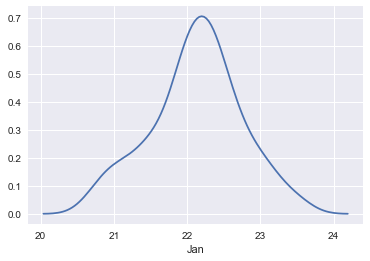

In [209]:
sns.distplot(bangalore.loc[:,'Jan'], hist=False, kde=True, bins=15)

In [155]:
def compare_KDE(month1, month2):
    f, (ax1) =  plt.subplots(1)
    sns.distplot(bangalore[month1], hist=False, kde=True, bins=15)
    sns.distplot(bangalore[month2], hist=False, kde=True, bins=15)
    #bangalore.hist(column=month2, bins=10, ax=ax1, color='red')
    
    plt.xlabel('Temperature')
    plt.ylabel('Number of Years')
    
    plt.title(month1 + ' vs. ' + month2)

/Users/JamesCassidy/anaconda/envs/py3k/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


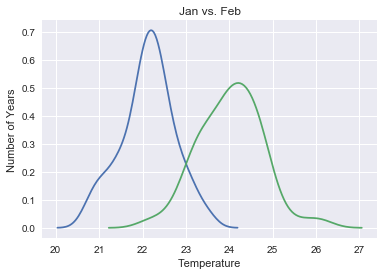

In [157]:
compare_KDE('Jan','Feb')

In [161]:
def compare_KDE_Hist(month1, month2):
    f, (ax1) =  plt.subplots(1)
    sns.distplot(bangalore[month1], hist=True, kde=True, bins=15)
    sns.distplot(bangalore[month2], hist=True, kde=True, bins=15)
    #bangalore.hist(column=month2, bins=10, ax=ax1, color='red')
    
    plt.xlabel('Temperature')
    plt.ylabel('Number of Years')
    
    plt.title(month1 + ' vs. ' + month2)

/Users/JamesCassidy/anaconda/envs/py3k/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


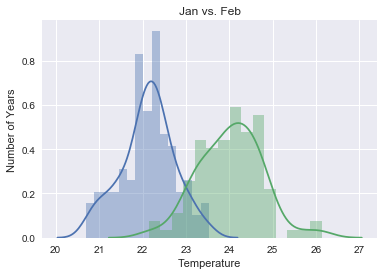

In [163]:
compare_KDE_Hist('Jan','Feb')

/Users/JamesCassidy/anaconda/envs/py3k/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


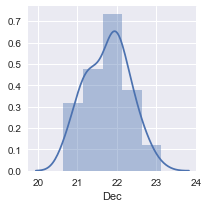

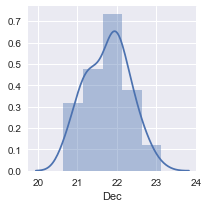

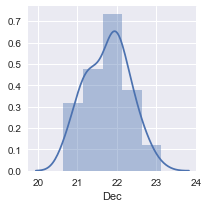

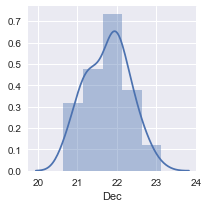

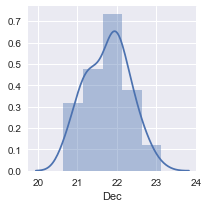

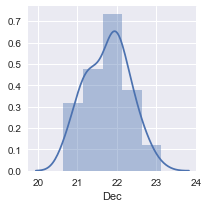

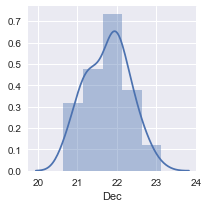

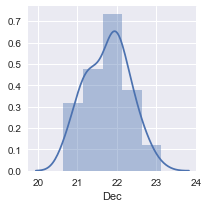

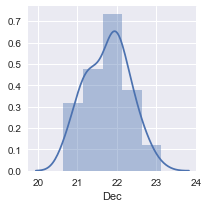

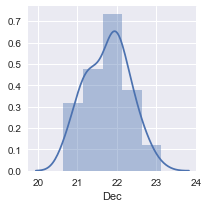

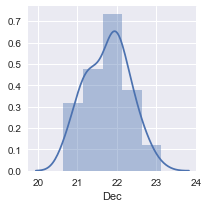

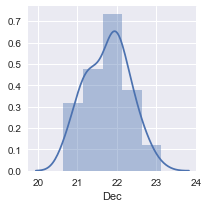

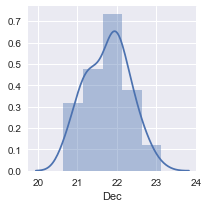

In [212]:
for month in bangalore.columns:
    f = sns.FacetGrid(bangalore)
    f.map(sns.distplot, mon, bins=5, hist=True, kde=True)

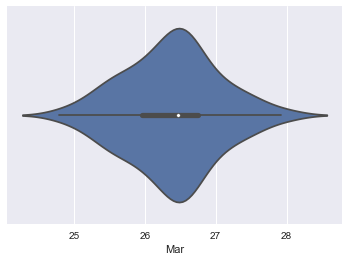

In [217]:
sns.violinplot(bangalore['Mar'])

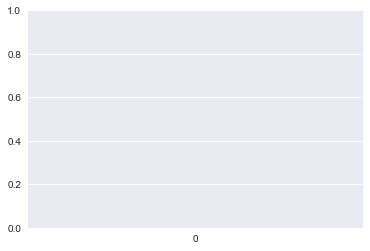

In [219]:
sns.violinplot(bangalore=[bangalore.Jan, bangalore.Feb])

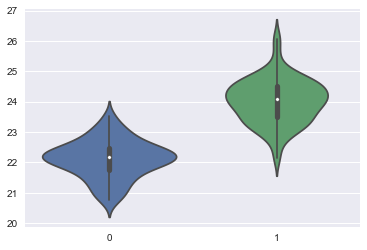

In [223]:
def compare_violin(month1, month2):
    mon1 = bangalore[month1]
    mon2 = bangalore[month2]
    
    ax0 = plt.subplot2grid((1,1),(0,0))
    
    sns.violinplot(data=[mon1,mon2],ax=ax0)

compare_violin('Jan', 'Feb')
    

### Task 4 - Insight

- Visually represent the varying temperatures over the entire period.
- Find the coldest and warmest months for May over the entire period.

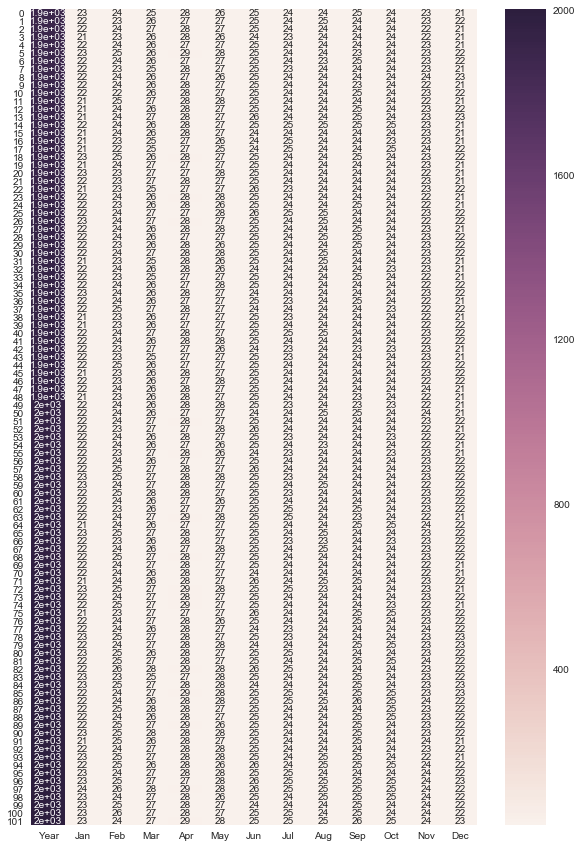

In [226]:
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(bangalore, annot=True, ax=ax)

In [235]:
bangalore.loc[:,'May'].min()

25.378

In [236]:
bangalore.loc[:,'May'].max()

28.271999999999998